# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './data/train.p'
validation_file='./data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# checking if the we have right number of rows
assert(X_train.shape[0]==y_train.shape[0])
assert(X_valid.shape[0]==y_valid.shape[0])
assert(X_test.shape[0]==y_test.shape[0])

print("Trainig features are a 4D array of traffic sign images \n examples:{},width:{}, height:{}, channels:{}"\
      .format(X_train.shape[0],X_train.shape[1],X_train.shape[2],X_train.shape[3]))
print("Trainig labels are a 1D array of traffic sign labels:{}"\
      .format(y_train.shape[0]))

Trainig features are a 4D array of traffic sign images 
 examples:34799,width:32, height:32, channels:3
Trainig labels are a 1D array of traffic sign labels:34799


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

In [3]:
print(y_train[:600])

[41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41
 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 41 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31
 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31 31

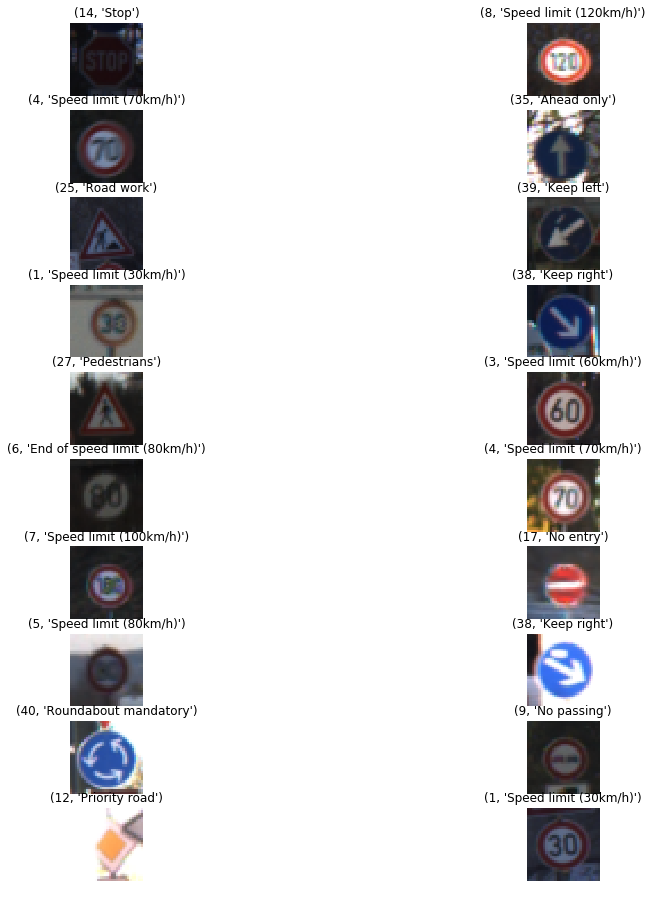

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

import pandas as pd
_sigNames=pd.read_csv('./signnames.csv')
d=_sigNames.set_index('ClassId')['SignName'].to_dict()


sample_size=20
_images=[]
_names=[]
_index=random.sample(range(len(y_train)), sample_size)

for x in _index:    
    _images.append(X_train[x].squeeze())
    _names.append(y_train[x])
    
plt.figure(figsize=(15,15))
columns = 2
for i, image in enumerate(zip(_names,_images)):
    plt.subplot(len(_images) / columns + 1, columns, i + 1)
    plt.subplots_adjust(top=1)
    plt.imshow(image[1],cmap='gray')
    image_title=(image[0],d[image[0]])
    plt.title(image_title, fontsize=12)
    plt.subplots_adjust(top=1,wspace = .2,hspace = .2)
    plt.axis('off')

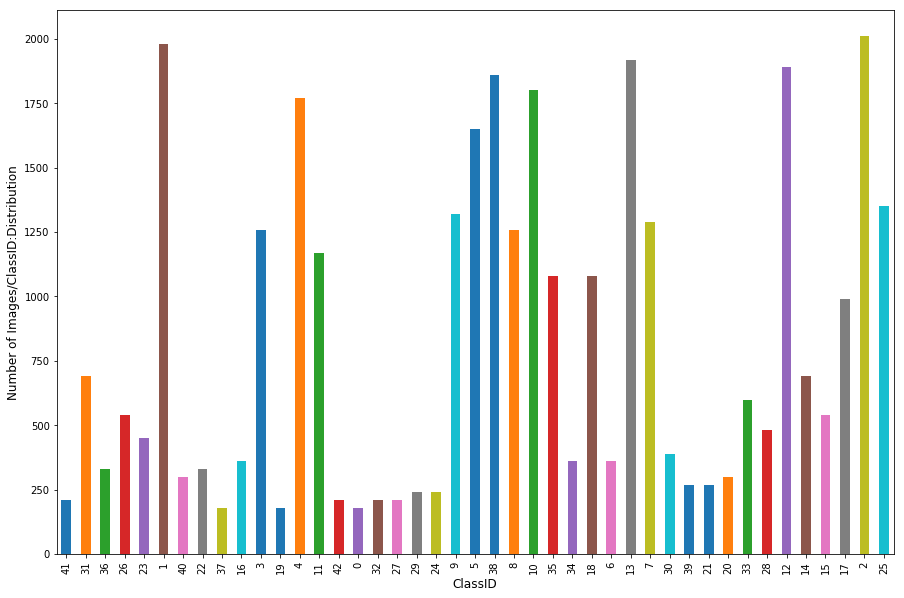

In [5]:
import pandas as pd
from collections import Counter
_labelCounts = Counter(y_train)

_ax=pd.Series(Counter(_labelCounts)).plot(kind='bar',align='center',figsize=(15,10))
_ax.set_xlabel("ClassID",fontsize=12)
_ax.set_ylabel("Number of Images/ClassID:Distribution",fontsize=12)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
print(np.mean(X_train),np.mean(X_valid),np.mean(X_test))

82.6775890369964 83.55642737563775 82.14846036120183


In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
X_valid,y_valid=shuffle(X_valid,y_valid)
X_test,y_test=shuffle(X_test,y_test)

#grayscaling images
X_train=np.sum(X_train/3, axis=3, keepdims=True)
X_valid=np.sum(X_valid/3, axis=3, keepdims=True)
X_test=np.sum(X_test/3, axis=3, keepdims=True)

#normalizing the dataset.
X_train=(X_train-128)/128
X_valid=(X_valid-128)/128
X_test=(X_test-128)/128

In [8]:
print(np.mean(X_train),np.mean(X_valid),np.mean(X_test))

-0.3540813356484654 -0.3472154111278299 -0.35821515342811083


In [9]:
print((X_train.shape),(X_valid.shape),(X_test.shape))

(34799, 32, 32, 1) (4410, 32, 32, 1) (12630, 32, 32, 1)


### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
_epochs =10
_batchSize=128
_dropout= 0.5 #forcing few weights to play dumb

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
#-----------------------------------Layer #1----------------------------------------#
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias 
    #weight = tf.Variable(tf.truncated_normal([_filterHeight, _filterWidth, _colorChannels, _kOutputDepth])
    #bias = tf.Variable(tf.zeros(_kOutputDepth))
    _filterHeight=5
    _filterWidth=5 #for 32x32x3 image, a 5x5 filter with a depth of 6(also called number of filters) is pure R&D 
    _colorChannels=1 #RBG
    _kOutputDepth=6
    _strides = [1, 1, 1, 1] # (batch, height, width, depth)                     
    conv1_W = tf.Variable(tf.truncated_normal(shape=(_filterHeight,_filterWidth,
                                                     _colorChannels,_kOutputDepth), mean = mu, stddev = sigma))    
    conv1_b = tf.Variable(tf.zeros(_kOutputDepth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=_strides, padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #The ksize and strides =[batch, height, width, channels]. 
    #For both ksize and strides, the batch and channel dimensions are typically set to 1    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
#-----------------------------------Layer #2----------------------------------------#

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    _filterHeight=5
    _filterWidth=5 #for 32x32x3 image, a 5x5 filter with a depth of 6(also called number of filters) is pure R&D 
    _colorChannels=6 #RBG
    _kOutputDepth=16
    _strides = [1, 1, 1, 1] # (batch, height, width, depth) 
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(_filterHeight,_filterWidth,
                                                     _colorChannels,_kOutputDepth), mean = mu, stddev = sigma)) 
    conv2_b = tf.Variable(tf.zeros(_kOutputDepth))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=_strides, padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
#-----------------------------------Layer #3----------------------------------------#
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
#-----------------------------------Layer #4----------------------------------------#
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
#-----------------------------------Layer #5----------------------------------------#
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
#-----------------------------Model Architecture------------------------------------------------#
    _modelArchitecture={
            'Layer1': ['Layer1:Convolutional:Input=32x32x1:Output=28x28x6:Filter:5x5:Stride:1x1:VALID',
                     'Layer1:Activation:Relu',
                     'Layer1:MaxPooling:Input=28x28x6:Output=14x14x6:ksize:2x2:Stride:2x2'],
            'Layer2': ['Layer2:Convolutional:Input=14x14x6:Output=10x10x16:Filter:5x5:Stride:1x1:VALID',
                     'Layer2:Activation:Relu','Layer2:MaxPooling:Input=10x10x16:Output=5x5x16:ksize:2x2:Stride:2x2',
                     'Layer2:Flatten:Input=5x5x16:Output=400'],
            'Layer3': ['Layer3:FullyConnected:Input=400:Output=120','Layer3:Activation:Relu'],
            'Layer4': ['Layer4:FullyConnected:Input=120:Output=84','Layer4:Activation:Relu'],
            'Layer5': ['Layer5:FullyConnected:Input=84:Output=43']
            }    
    return logits,_modelArchitecture

In [12]:
def _LeNet_wdropout(input):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
#-----------------------------------Layer #1----------------------------------------#
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Weight and bias 
    #weight = tf.Variable(tf.truncated_normal([_filterHeight, _filterWidth, _colorChannels, _kOutputDepth])
    #bias = tf.Variable(tf.zeros(_kOutputDepth))
    _filterHeight=5
    _filterWidth=5 #for 32x32x1 image, a 5x5 filter with a depth of 6(also called number of filters) is pure R&D 
    _colorChannels=1 #RBG
    _kOutputDepth=6
    _strides = [1, 1, 1, 1] # (batch, height, width, depth)                     
    conv1_W = tf.Variable(tf.truncated_normal(shape=(_filterHeight,_filterWidth,
                                                     _colorChannels,_kOutputDepth), mean = mu, stddev = sigma))    
    conv1_b = tf.Variable(tf.zeros(_kOutputDepth))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=_strides, padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #The ksize and strides =[batch, height, width, channels]. 
    #For both ksize and strides, the batch and channel dimensions are typically set to 1    
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#-----------------------------------Layer #2----------------------------------------#

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    _filterHeight=5
    _filterWidth=5 #for 14x14x6 image, a 5x5 filter with a depth of 16(also called number of filters) is pure R&D 
    _colorChannels=6 #RBG
    _kOutputDepth=16
    _strides = [1, 1, 1, 1] # (batch, height, width, depth) 
    
    conv2_W = tf.Variable(tf.truncated_normal(shape=(_filterHeight,_filterWidth,
                                                     _colorChannels,_kOutputDepth), mean = mu, stddev = sigma)) 
    conv2_b = tf.Variable(tf.zeros(_kOutputDepth))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=_strides, padding='VALID') + conv2_b
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    #SOLUTION: Dropout.
    fc0    = tf.nn.dropout(fc0, keep_prob)
#-----------------------------------Layer #3----------------------------------------#
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    # SOLUTION: Dropout.
    fc1    = tf.nn.dropout(fc1, keep_prob)
#-----------------------------------Layer #4----------------------------------------#
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    # SOLUTION: Dropout.
    fc2    = tf.nn.dropout(fc2, keep_prob)
#-----------------------------------Layer #5----------------------------------------#
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
#-----------------------------Model Architecture------------------------------------------------#
    _modelArchitecture={
            'Layer1': ['Layer1:Convolutional:Input=32x32x1:Output=28x28x6:Filter:5x5:Stride:1x1:VALID',
                     'Layer1:Activation:Relu',
                     'Layer1:MaxPooling:Input=28x28x6:Output=14x14x6:ksize:2x2:Stride:2x2'],
            'Layer2': ['Layer2:Convolutional:Input=14x14x6:Output=10x10x16:Filter:5x5:Stride:1x1:VALID',
                     'Layer2:Activation:Relu','Layer2:MaxPooling:Input=10x10x16:Output=5x5x16:ksize:2x2:Stride:2x2',
                     'Layer2:Flatten:Input=5x5x16:Output=400',
                     'Layer2:Dropout:Keep Probability:0.5'],
            'Layer3': ['Layer3:FullyConnected:Input=400:Output=120','Layer3:Activation:Relu',
                       'Layer3:Dropout:Keep Probability:0.5'],
            'Layer4': ['Layer4:FullyConnected:Input=120:Output=84','Layer4:Activation:Relu',
                      'Layer4:Dropout:Keep Probability:0.5'],
            'Layer5': ['Layer5:FullyConnected:Input=84:Output=43']
            }    
    
    return logits,_modelArchitecture

In [13]:
# Input/Image
#input = tf.placeholder(tf.float32,shape=[None, image_height, image_width, color_channels])

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

_learningRate = 0.0006 #slower rate 

logits,_modelArchitecture = _LeNet_wdropout(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = _learningRate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation

In [15]:
#below two lines are the entire evaluation pipeline !!
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # mean of individual accuracies
## saver = tf.train.Saver()

#building an evalution function to run the above evalution pipleine i.e. we need to pass data.
# We dont need to shuffle the data while eval. It is required only during training to make sure that model ignores data submission patterns
# pls keep in mind that tensorflow 'session' is the only event that triggers or sets everything in motion similar to like user mouse click or pressing enter.
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, _batchSize): #batching the images/dataset to sync with available memory.
        batch_x, batch_y = X_data[offset:offset+_batchSize], y_data[offset:offset+_batchSize]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the model

In [16]:
import pytz
from datetime import datetime # to add date and time to the saved model
import os
import pwd
import pathlib
import h5py
import numpy as np

class _fingerPrinting():
    
    # Class Attribute
    _user=pwd.getpwuid(os.getuid()).pw_name
    _generationDate = pytz.utc.localize(datetime.utcnow()).strftime('_%Y%h%d-%H:%M:%S%Z')
    
    # Initializer / Instance Attributes
    def __init__(self,_path='./',_ver='0.0.1',_trainingDataVersion=0):
        self._path = _path        
        self._modelArchitectureVersion= _ver #Application version MVP Ver 0.0.1
        
        self._modelrunVersion = 0
        self._modelAccuracy = 0.00
        self._trainingDataVersion= _trainingDataVersion
        self._testDataVersion = 0
        
    def _whoami(self):
        return "I was instantiated by {} on:{}. Model generation:{}".format(self._user,self._generationDate,self._modelArchitectureVersion)
    
    def _mountFilepath(self):
        try:
            _path=self._path+self._user+'/'+self._modelArchitectureVersion+self._generationDate
            pathlib.Path(_path).mkdir(parents=True, exist_ok=True)
        except:
            return self._path
        return _path
    
    def _saveModel(self,_sess=object,
                   _modelArchitecture={'NoLayer':['NoLayerInfo']},
                   X_train=np.random.randn(1),y_train=np.random.randn(1),
                   _modelAccuracy=0.00                   
                  ):
        return './s'

In [17]:
_fingerPrintingO=_fingerPrinting(_ver='0.0.2')
_fingerPrintingO._whoami()
_accuracies = []

In [19]:
#reconfiguring model run parameters
_epochs =150
_batchSize=128
_dropout= 0.5 #forcing few weights to play dump
with tf.Session() as sess: #initiate the tensorflow session. 
    sess.run(tf.global_variables_initializer())     
    num_examples = len(X_train)
    _runAccuracies=[]
    
    print("Training...")
    print()
    for i in range(_epochs):
        X_train, y_train = shuffle(X_train, y_train) #remove any bias due to order of the images
        for offset in range(0, num_examples, _batchSize):
            end = offset + _batchSize
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: _dropout})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        _runAccuracies.append(validation_accuracy)
        
    _fileName=_fingerPrintingO._saveModel(_sess=sess,_modelArchitecture=_modelArchitecture,X_train=X_train,y_train=y_train,_modelAccuracy=validation_accuracy)
    _accuracies.append([[_epochs],_runAccuracies])
    print("Model saved")
    
    sess.close() #tensorflow is leaking memory. hopefully this solves the problem

Training...

EPOCH 1 ...
Validation Accuracy = 0.156

EPOCH 2 ...
Validation Accuracy = 0.457

EPOCH 3 ...
Validation Accuracy = 0.605

EPOCH 4 ...
Validation Accuracy = 0.692

EPOCH 5 ...
Validation Accuracy = 0.765

EPOCH 6 ...
Validation Accuracy = 0.805

EPOCH 7 ...
Validation Accuracy = 0.829

EPOCH 8 ...
Validation Accuracy = 0.841

EPOCH 9 ...
Validation Accuracy = 0.857

EPOCH 10 ...
Validation Accuracy = 0.867

EPOCH 11 ...
Validation Accuracy = 0.884

EPOCH 12 ...
Validation Accuracy = 0.892

EPOCH 13 ...
Validation Accuracy = 0.883

EPOCH 14 ...
Validation Accuracy = 0.902

EPOCH 15 ...
Validation Accuracy = 0.903

EPOCH 16 ...
Validation Accuracy = 0.911

EPOCH 17 ...
Validation Accuracy = 0.907

EPOCH 18 ...
Validation Accuracy = 0.913

EPOCH 19 ...
Validation Accuracy = 0.915

EPOCH 20 ...
Validation Accuracy = 0.925

EPOCH 21 ...
Validation Accuracy = 0.922

EPOCH 22 ...
Validation Accuracy = 0.927

EPOCH 23 ...
Validation Accuracy = 0.927

EPOCH 24 ...
Validation Accura

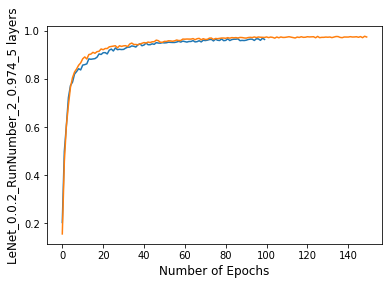

In [20]:
#printing Model Accuracies vs Epoch
for _epoch,_acc in _accuracies:
    _=plt.plot(range(_epoch[0]),_acc)
    plt.xlabel("Number of Epochs",fontsize=12)
    plt.ylabel(_fileName[1:-5],fontsize=12)
    plt.show

In [21]:
#Testing with current model
with tf.Session() as sess:
    _saver = tf.train.import_meta_graph('./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5.meta')
    _saver.restore(sess, tf.train.latest_checkpoint('./root/0.0.2_2019Apr21-07:47:07UTC/'))
    test_accuracy = evaluate(X_test, y_test)    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5
Test Accuracy = 0.952



In [22]:
#Testing with older model
with tf.Session() as sess:
    _saver = tf.train.import_meta_graph('./root/0.0.2_2019Apr20-19:49:06UTC/LeNet_0.0.2_RunNumber_2_0.97_5 layers.hdf5.meta')
    _saver.restore(sess, tf.train.latest_checkpoint('./root/0.0.2_2019Apr20-19:49:06UTC/'))
    test_accuracy = evaluate(X_test, y_test)    
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print()

INFO:tensorflow:Restoring parameters from ./root/0.0.2_2019Apr20-19:49:06UTC/LeNet_0.0.2_RunNumber_2_0.97_5 layers.hdf5
Test Accuracy = 0.944



## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

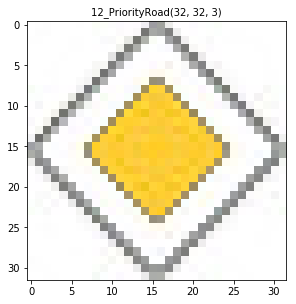

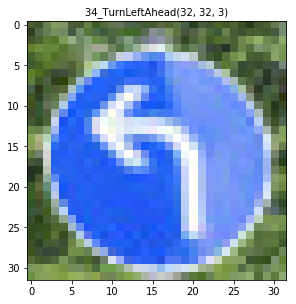

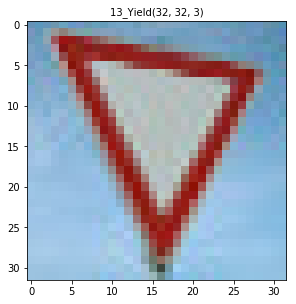

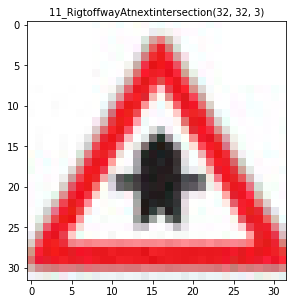

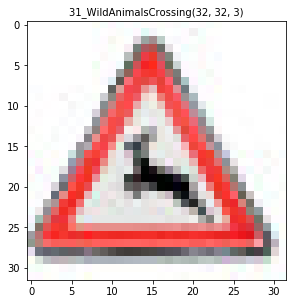

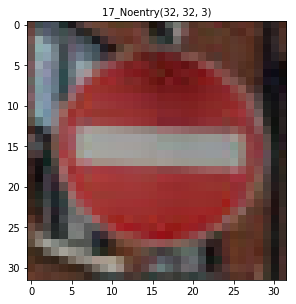

In [29]:
_imgfiles= glob.glob('../CarND-Traffic-Sign-Classifier-Project/webSample/*.jpg')
for fname in _imgfiles:
    img=mpimg.imread(fname)        
    images=[img]

    plt.figure(figsize=(10,4))
    columns = 2
    for i, image in enumerate(zip(['Web Image'],images)):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
        plt.imshow(image[1])
        image_title=fname.split('/')[3][:-4]+str(image[1].shape)
        plt.title(image_title, fontsize=10)
    

In [33]:
X_test_web = []
y_test_web = []

_imgfiles= glob.glob('../CarND-Traffic-Sign-Classifier-Project/webSample/*.jpg')
for fname in _imgfiles:
    print(fname)
    X_test_web.append(np.array(mpimg.imread(fname)))
    y_test_web.append(int(fname.split('/')[3].split('_')[0]))

#Balancing image size
for a in range(len(X_test_web)):
    print(X_test_web[a].shape)
#     if X_test_web[a].shape[0]==28:
#       X_test_web[a]=cv2.copyMakeBorder(X_test_web[a],2,2,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])

../CarND-Traffic-Sign-Classifier-Project/webSample/12_PriorityRoad.jpg
../CarND-Traffic-Sign-Classifier-Project/webSample/34_TurnLeftAhead.jpg
../CarND-Traffic-Sign-Classifier-Project/webSample/13_Yield.jpg
../CarND-Traffic-Sign-Classifier-Project/webSample/11_RigtoffwayAtnextintersection.jpg
../CarND-Traffic-Sign-Classifier-Project/webSample/31_WildAnimalsCrossing.jpg
../CarND-Traffic-Sign-Classifier-Project/webSample/17_Noentry.jpg
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


In [34]:
print(np.mean(np.array(X_test_web)))

167.18766276041666


In [35]:
#grayscaling images
X_test_web=np.sum(np.array(X_test_web)/3, axis=3, keepdims=True)

#normalizing the dataset.
X_test_web=(X_test_web-128)/128

In [36]:
print(np.mean(X_test_web))
print((X_test_web.shape))

0.3061536153157552
(6, 32, 32, 1)


### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#import tensorflow as tf
#from tensorflow.contrib.layers import flatten
_predictions=tf.argmax(logits,1)

with tf.Session() as sess:
    _saver = tf.train.import_meta_graph('./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5.meta')
    _saver.restore(sess, tf.train.latest_checkpoint('./root/0.0.2_2019Apr21-07:47:07UTC/'))
    predictions = sess.run(_predictions, feed_dict={x: X_test_web, keep_prob: 1.0})
        
    print("Predictions {}".format(predictions))
    print()

INFO:tensorflow:Restoring parameters from ./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5
Predictions [12 34 13 11 31 17]



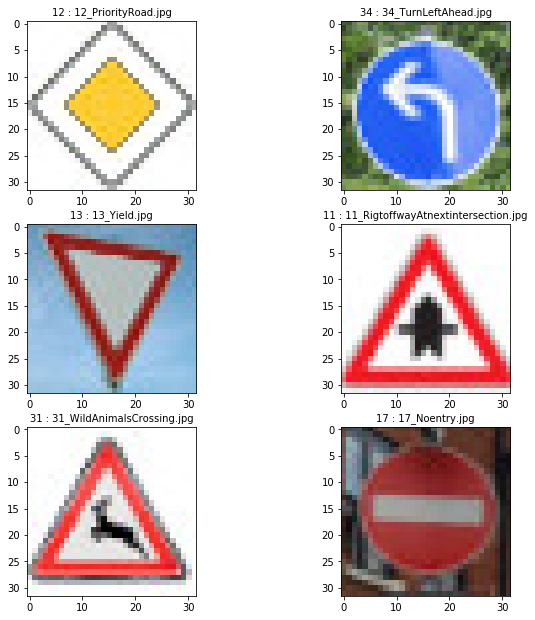

In [39]:
_imgfiles= glob.glob('../CarND-Traffic-Sign-Classifier-Project/webSample/*.jpg')
images=[]
for fname in _imgfiles:
    img=mpimg.imread(fname)
    images.append([fname.split('/')[3],img])
    
plt.figure(figsize=(8,6))
columns = 2
for i, image in enumerate(zip(predictions,images)):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.subplots_adjust(left=0., right=1, top=2, bottom=.2)
    plt.imshow(image[1][1])    
    image_title=str(image[0])+' : '+image[1][0]
    plt.title(image_title, fontsize=10)

### Analyze Performance

In [40]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    _saver = tf.train.import_meta_graph('./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5.meta')
    _saver.restore(sess, tf.train.latest_checkpoint('./root/0.0.2_2019Apr21-07:47:07UTC/'))
    
    _accuracy = evaluate(X_test_web, y_test_web)
    print("Web sample test accuracy = {:.3f}".format(_accuracy))

INFO:tensorflow:Restoring parameters from ./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5
Web sample test accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [41]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
_topCounter=5 #top five softmax probabilities
_softmaxLogits = tf.nn.softmax(logits)
_top_k=tf.nn.top_k(_softmaxLogits,_topCounter)

with tf.Session() as sess:
    _saver = tf.train.import_meta_graph('./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5.meta')
    _saver.restore(sess, tf.train.latest_checkpoint('./root/0.0.2_2019Apr21-07:47:07UTC/'))
    _softmaxProbabilities = sess.run(_top_k, feed_dict={x: X_test_web, keep_prob: 1.0})

    print(_softmaxProbabilities)

INFO:tensorflow:Restoring parameters from ./root/0.0.2_2019Apr21-07:47:07UTC/LeNet_0.0.2_RunNumber_2_0.974_5 layers.hdf5
TopKV2(values=array([[1.0000000e+00, 2.1876867e-11, 2.4171733e-15, 3.1530888e-18,
        2.9180556e-18],
       [9.9971455e-01, 2.8537720e-04, 1.1114246e-08, 9.0510578e-11,
        8.0737805e-11],
       [1.0000000e+00, 1.4904440e-31, 1.3755495e-34, 1.3807317e-36,
        0.0000000e+00],
       [9.9999666e-01, 3.3463998e-06, 2.5328650e-10, 1.2232812e-11,
        9.1886546e-13],
       [9.9999547e-01, 4.1046669e-06, 2.3358255e-07, 2.1938925e-07,
        1.2393053e-08],
       [9.9995124e-01, 4.7804297e-05, 8.4437039e-07, 6.3397572e-08,
        8.2578495e-09]], dtype=float32), indices=array([[12, 40, 13,  9, 42],
       [34, 38, 13, 35,  9],
       [13, 12, 35, 15,  0],
       [11, 30, 27, 21, 25],
       [31, 19, 23, 21, 29],
       [17, 14, 38, 12,  0]], dtype=int32))


#### Actual ClassID 12==>Predicted Class ID: 12(100%), 40(2.18e-11%), 13(2.41e-15),  9(3.15e-18), 42(2.9e-18)
#### Actual ClassID 34==>Predicted Class ID: 34(9.99e-01), 38(2.85e-4), 13(1.1e-8), 35(9.05e-11),  9(8.07e-11)
#### Actual ClassID 13==>Predicted Class ID: 13(1.0e+00), 12(1.49e-31), 35(1.37e-34), 15(1.38e-36),0(0.0+00)
#### Actual ClassID 11==>Predicted Class ID: 11(9.99e-01), 30(3.34e-06), 27(2.53e-10), 21(1.22e-11),25(9.18e-13)
#### Actual ClassID 31==>Predicted Class ID: 31(9.99e-01), 19(4.10e-06),23(2.33e-07),21(2.19e-07),29(1.23e-08)
#### Actual ClassID 17==>Predicted Class ID: 17(9.99e-01), 14(4.78e-05),38(8.44e-07),12(6.33e-08),0(8.25e-09)

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")